In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
file_path = "/content/april_combined_dataset.csv"
df = pd.read_csv(file_path)
df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,...,TAXI_OUT,WHEELS_OFF,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,11.0,559.0,0.0,0.0,NaN,0.0,96.0,87.0,569.0,3
1,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,12.0,715.0,0.0,0.0,NaN,0.0,102.0,89.0,569.0,3
2,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,10.0,906.0,0.0,0.0,NaN,0.0,108.0,94.0,569.0,3
3,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,9.0,1343.0,0.0,0.0,NaN,0.0,100.0,101.0,569.0,3
4,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,12.0,1647.0,0.0,0.0,NaN,0.0,104.0,102.0,569.0,3


In [51]:
len(df)

2308855

# **Attributes**
*  ***Year:*** Calendar year of the flight. (Here we are choosing 5 years dataset from 1998 to 2003).
*  ***Quarter:*** Quarter of the year ranging from 1 to 4. Since we are focusing on the month of April, the corresponding quarter value is 2.
*  ***Month:*** Represents the month of the year, ranging from 1 (January) to 12
(December).

* ***Day of the Month:*** Specifies the day of the month, ranging from 1 to 31.

* ***Day of the Week:*** Indicates the day of the week, where 1 corresponds to Monday and 7 to Sunday.
* ***Op_unique_carrier:*** A unique two-letter or alphanumeric code assigned by the U.S. Department of Transportation (DOT) to identify each operating airline.

  For example:
  * AA - American Airlines

  * DL - Delta Air Lines

  * UA - United Airlines

  * WN - Southwest Airlines

  * AS - Alaska Airlines

* ***Dep_Time:*** Departure time recorded in minutes.

* ***Origin:*** The airport code (3-character unique identifier) of the flight's departure location.

* ***Origin_state_ABR:*** State abbreviation of origin airport.
  
* ***Dest:*** The airport code (3-character unique identifier) of the flight's arrival location.

* ***Dest_state_ABR:*** State abbreviation of destination airport.

* ***Dep_delay_group***: Departure delay in 15-minute interval bins.

* ***Taxi_out***: Minutes spent taxiing before takeoff.

* ***Wheels_Off***:Actual takeoff time in minutes.

* ***Dep_Del15:*** Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Arr_Del15:*** Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Cancellation_Code:***  Reason for cancellation (A=Carrier, B=Weather, etc.).

* ***Cancelled:*** A Boolean value indicating whether the flight was canceled.

* ***Diverted:*** A Boolean value indicating whether the flight was rerouted.

* ***Crs_elapsed_time:*** Scheduled total flight time (gate-to-gate).

* ***Actual_elapsed_time:*** Actual total flight time (gate-to-gate).

* ***Air_Time:*** The total time in minutes from takeoff to landing.

* ***Distance:*** The distance traveled by the flight, measured in miles.

* ***Distance_Group:*** A categorical classification of flight distances into predefined ranges. For example:

  * Short-haul flights (0–250 miles)

  * Medium-haul flights (251–500 miles)

  * Long-haul flights (501–1000 miles)

  * Very long-haul flights (1001+ miles)


  

In [52]:
df[['YEAR', 'MONTH', 'QUARTER', 'CANCELLATION_CODE']].sample(5)

,YEAR,MONTH,QUARTER,CANCELLATION_CODE
1511068,2001,4,2,NaN
2141992,2002,4,2,NaN
928820,2000,4,2,NaN
1985015,2002,4,2,NaN
1277101,2000,4,2,NaN


In [53]:
## this cell is just to get a screenshot of replacing NaN valuesd

df.ARR_DEL15.sample(5)

,ARR_DEL15
2014335,0.0
992110,0.0
136324,0.0
2068947,0.0
2177959,0.0


In [55]:
print("Total features:", df.shape[1])

Total features: 23


In [56]:
r1 = df.shape
df.drop(columns = ['MONTH', 'QUARTER', 'CANCELLATION_CODE', 'ACTUAL_ELAPSED_TIME'], inplace = True)
r2 = df.shape

print(f"The number of constant/irrelevant/leaky_columns we dropped {r1[1] - r2[1]}")


The number of constant/irrelevant/leaky_columns we dropped 4


In [57]:
r1 = df.shape[0]
r2 = df.dropna().shape[0]

print(f"The total number of rows initially {r1}")
print(f"The total number of rows after droping all rows containing any NaN value {r2}")

print(f"The percentage of data points lost {(r1-r2)*100/r1:.2f} %")

The total number of rows initially 2308855
The total number of rows after droping all rows containing any NaN value 2260511
The percentage of data points lost 2.09 %


# **Attributes**

*  ***Month:*** Represents the month of the year, ranging from 1 (January) to 12
(December).


* ***Day of the Month:*** Specifies the day of the month, ranging from 1 to 31.

* ***Day of the Week:*** Indicates the day of the week, where 1 corresponds to Monday and 7 to Sunday.

* ***Dep_Time:*** Departure time recorded in minutes.

* ***Origin:*** The airport code (3-character unique identifier) of the flight's departure location.

* ***Dest:*** The airport code (3-character unique identifier) of the flight's arrival location.

* ***Dep_Del15:*** Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Arr_Del15:*** Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Cancelled:*** A Boolean value indicating whether the flight was canceled.

* ***Diverted:*** A Boolean value indicating whether the flight was rerouted.

* ***Air_Time:*** The total time in minutes from takeoff to landing.

* ***Distance:*** The distance traveled by the flight, measured in miles.

* ***Distance_Group:*** A categorical classification of flight distances into predefined ranges. For example:

  * Short-haul flights (0–250 miles)

  * Medium-haul flights (251–500 miles)

  * Long-haul flights (501–1000 miles)

  * Very long-haul flights (1001+ miles)


  

# Columns we are interested in:

In [58]:
df.shape

(2308855, 19)

In [59]:
df.columns

Index(['YEAR', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_STATE_ABR', 'DEST', 'DEST_STATE_ABR', 'DEP_TIME', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'TAXI_OUT', 'WHEELS_OFF', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

In [60]:
#creating the dataframe with Column Name and Unique Values
unique_values = pd.DataFrame({
    'Column Name': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns]
})


print(unique_values)


          Column Name  Unique Values
0                YEAR              5
1        DAY_OF_MONTH             30
2         DAY_OF_WEEK              7
3   OP_UNIQUE_CARRIER             12
4              ORIGIN            230
5    ORIGIN_STATE_ABR             51
6                DEST            229
7      DEST_STATE_ABR             51
8            DEP_TIME           1417
9           DEP_DEL15              2
10    DEP_DELAY_GROUP             15
11           TAXI_OUT            283
12         WHEELS_OFF           1416
13          ARR_DEL15              2
14          CANCELLED              2
15           DIVERTED              2
16   CRS_ELAPSED_TIME            504
17           DISTANCE           1164
18     DISTANCE_GROUP             11


In [61]:
df.describe()

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
count,2.308855e+06,2.308855e+06,2.308855e+06,2.265411e+06,2.265411e+06,2.265411e+06,2.265411e+06,2.265252e+06,2.260670e+06,2.308855e+06,2.308855e+06,2.308842e+06,2.308855e+06,2.308855e+06
mean,2.000024e+03,1.550948e+01,3.940797e+00,1.350217e+03,1.594629e-01,4.676458e-02,1.524942e+01,1.371126e+03,1.992980e-01,1.881625e-02,2.053399e-03,1.271402e+02,7.439306e+02,3.447796e+00
std,1.394001e+00,8.655023e+00,2.001780e+00,4.840688e+02,3.661073e-01,1.707352e+00,1.009182e+01,4.867113e+02,3.994726e-01,1.358757e-01,4.526790e-02,6.962120e+01,5.629357e+02,2.225243e+00
min,1.998000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.600000e+01,2.100000e+01,1.000000e+00
25%,1.999000e+03,8.000000e+00,2.000000e+00,9.290000e+02,0.000000e+00,-1.000000e+00,1.000000e+01,9.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,3.280000e+02,2.000000e+00
50%,2.000000e+03,1.600000e+01,4.000000e+00,1.335000e+03,0.000000e+00,0.000000e+00,1.300000e+01,1.348000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,5.900000e+02,3.000000e+00
75%,2.001000e+03,2.300000e+01,6.000000e+00,1.742000e+03,0.000000e+00,0.000000e+00,1.800000e+01,1.757000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+02,9.870000e+02,4.000000e+00
max,2.002000e+03,3.000000e+01,7.000000e+00,2.400000e+03,1.000000e+00,1.200000e+01,1.439000e+03,2.400000e+03,1.000000e+00,1.000000e+00,1.000000e+00,6.700000e+02,4.962000e+03,1.100000e+01


In [62]:
#Is there any null values?
df.isnull().sum()

,0
YEAR,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
ORIGIN,0
ORIGIN_STATE_ABR,0
DEST,0
DEST_STATE_ABR,0
DEP_TIME,43444
DEP_DEL15,43444


In [64]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# numeric
numeric_summary = df[numeric_cols].describe().T
numeric_summary['median'] = df[numeric_cols].median()
numeric_summary['missing_values'] = df[numeric_cols].isnull().sum()
numeric_summary['missing_%'] = (df[numeric_cols].isnull().mean() * 100).round(2)
numeric_summary = numeric_summary.round(2)

print("Numerical Feature Summary:")
display(numeric_summary)

# categorical
categorical_summary = df[categorical_cols].describe().T
categorical_summary['missing_values'] = df[categorical_cols].isnull().sum()
categorical_summary['missing_%'] = (df[categorical_cols].isnull().mean() * 100).round(2)

print("\nCategorical Feature Summary:")
display(categorical_summary)


Numerical Feature Summary:


,count,mean,std,min,25%,50%,75%,max,median,missing_values,missing_%
YEAR,2308855.0,2000.02,1.39,1998.0,1999.0,2000.0,2001.0,2002.0,2000.0,0,0.00
DAY_OF_MONTH,2308855.0,15.51,8.66,1.0,8.0,16.0,23.0,30.0,16.0,0,0.00
DAY_OF_WEEK,2308855.0,3.94,2.00,1.0,2.0,4.0,6.0,7.0,4.0,0,0.00
DEP_TIME,2265411.0,1350.22,484.07,1.0,929.0,1335.0,1742.0,2400.0,1335.0,43444,1.88
DEP_DEL15,2265411.0,0.16,0.37,0.0,0.0,0.0,0.0,1.0,0.0,43444,1.88
DEP_DELAY_GROUP,2265411.0,0.05,1.71,-2.0,-1.0,0.0,0.0,12.0,0.0,43444,1.88
TAXI_OUT,2265411.0,15.25,10.09,1.0,10.0,13.0,18.0,1439.0,13.0,43444,1.88
WHEELS_OFF,2265252.0,1371.13,486.71,1.0,943.0,1348.0,1757.0,2400.0,1348.0,43603,1.89
ARR_DEL15,2260670.0,0.20,0.40,0.0,0.0,0.0,0.0,1.0,0.0,48185,2.09
CANCELLED,2308855.0,0.02,0.14,0.0,0.0,0.0,0.0,1.0,0.0,0,0.00



Categorical Feature Summary:


,count,unique,top,freq,missing_values,missing_%
OP_UNIQUE_CARRIER,2308855,12,WN,367640,0,0.0
ORIGIN,2308855,230,ORD,128926,0,0.0
ORIGIN_STATE_ABR,2308855,51,CA,277775,0,0.0
DEST,2308855,229,ORD,128922,0,0.0
DEST_STATE_ABR,2308855,51,CA,277803,0,0.0


<ipython-input-65-e7eea2498237>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="mako")


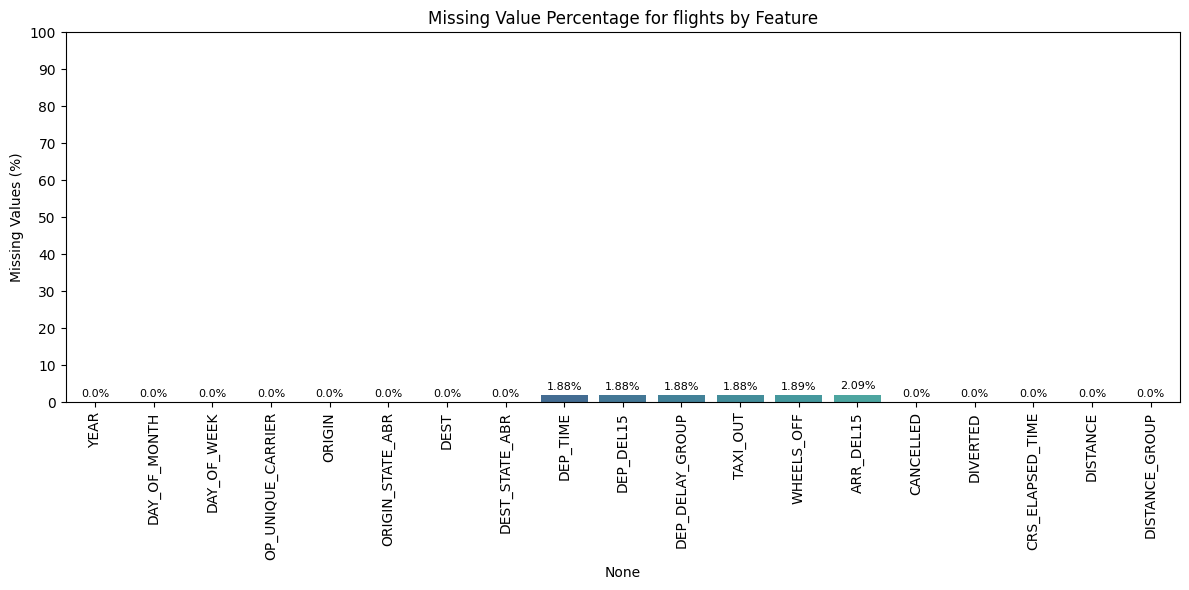

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="mako")
plt.title("Missing Value Percentage for flights by Feature")
plt.ylabel("Missing Values (%)")
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
for index, value in enumerate(missing_percent.values):
    plt.text(index, value + 1, f'{value}%', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()



# What is the best way to handle missing values?

**Approach 1**: Using mean when skewness is low and median when skewness is high

**Approach 2**: Use mean for all columns

**Approach 3**: Use median for all columns

**Approach 4**: Drop any row that contains NaN values

In [66]:

def handle_missing_values(df, app_number):
    # Step 1: Remove duplicate rows first
    df = df.drop_duplicates()

    # Step 2: Fill missing values in the target column 'ARR_DEL15' using its median
    # We use the median to keep the target class (y) to be binary. If we repalce with mean -> we might end up with continuous values which is undesirable.
    df.loc[:, 'ARR_DEL15'] = df['ARR_DEL15'].fillna(df['ARR_DEL15'].mode()[0])

    # Step 3: Handle missing values
    if app_number == 1:
        df_app = df.copy()
        # Approach 1: We will use skewness to determine whether to fill missing values with mean(mean for low skew) or median(median for high skew)
        for column in df.select_dtypes(include=['number']).columns:
            if df_app[column].skew() < 1:  # If skewness is low --> use mean
                df_app[column] = df_app[column].fillna(df_app[column].mean())
            else:  # If skewness is high --> use median
                df_app[column] = df_app[column].fillna(df_app[column].median())

    elif app_number == 2:
        # Approach 2: Replace all numeric missing values with the mean
        df_app = df.copy()
        for column in df.select_dtypes(include=['number']).columns:
            df_app[column] = df_app[column].fillna(df_app[column].mean())

    elif app_number == 3:
        # Approach 3: Similar to Approach 2 (Replace all numeric missing values with the mean)
        df_app = df.copy()
        for column in df.select_dtypes(include=['number']).columns:
            df_app[column] = df_app[column].fillna(df_app[column].mean())

    elif app_number == 4:
        # Approach 4: Remove rows that contain any missing values
        df_app = df.dropna()

    else:
        raise ValueError("Invalid app_number. Please choose a value between 1 and 4.")

    return df_app

# Understanding the Correlation between Attributes

In [67]:
df = handle_missing_values(df, 4)

In [68]:
df["DEP_DEL15"] = df["DEP_DEL15"].astype('category')
df["ARR_DEL15"] = df["ARR_DEL15"].astype('category')
df["DIVERTED"] = df["DIVERTED"].astype('category')
df["CANCELLED"] = df["CANCELLED"].astype('category')

In [69]:
df.select_dtypes(include = 'number').corr()

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
YEAR,1.000000,-0.000850,-0.021515,-0.008837,-0.042791,0.014297,-0.008108,0.019203,0.004524,0.004663
DAY_OF_MONTH,-0.000850,1.000000,0.012660,-0.002083,-0.031122,-0.013549,-0.001967,-0.001032,0.000388,0.000359
DAY_OF_WEEK,-0.021515,0.012660,1.000000,0.009002,0.039549,-0.010793,0.008173,0.014919,0.014920,0.015371
DEP_TIME,-0.008837,-0.002083,0.009002,1.000000,0.193110,0.054442,0.975197,-0.033301,-0.037732,-0.038402
DEP_DELAY_GROUP,-0.042791,-0.031122,0.039549,0.193110,1.000000,0.050644,0.182538,-0.001492,-0.000157,-0.000017
TAXI_OUT,0.014297,-0.013549,-0.010793,0.054442,0.050644,1.000000,0.080684,0.215578,0.176037,0.173571
WHEELS_OFF,-0.008108,-0.001967,0.008173,0.975197,0.182538,0.080684,1.000000,-0.030970,-0.038586,-0.039343
CRS_ELAPSED_TIME,0.019203,-0.001032,0.014919,-0.033301,-0.001492,0.215578,-0.030970,1.000000,0.984761,0.973493
DISTANCE,0.004524,0.000388,0.014920,-0.037732,-0.000157,0.176037,-0.038586,0.984761,1.000000,0.987361
DISTANCE_GROUP,0.004663,0.000359,0.015371,-0.038402,-0.000017,0.173571,-0.039343,0.973493,0.987361,1.000000


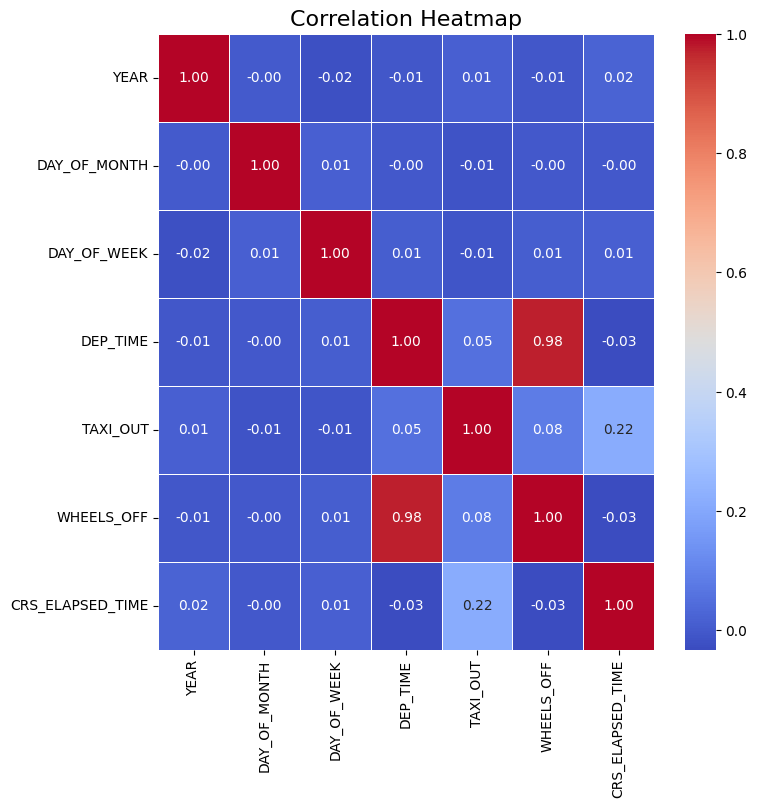

In [70]:
df_focussed_corr = df[['YEAR', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'CRS_ELAPSED_TIME']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(df_focussed_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

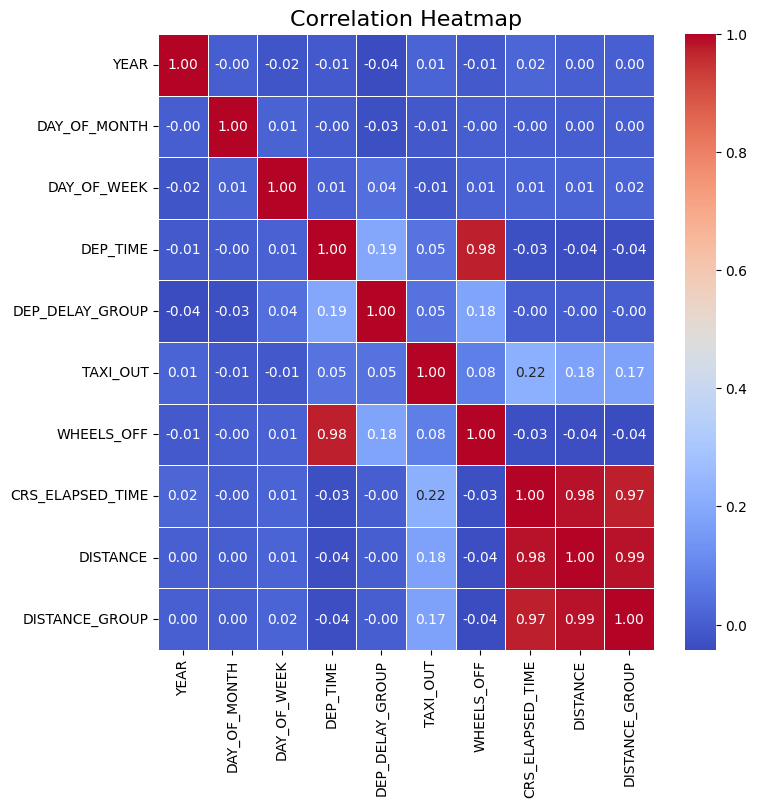

In [71]:

corr_matrix = df.select_dtypes('number').corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Understanding the Distribution of our Target Class

**Observation:** - Class Imbalance

The distribution shows class imbalance where the number of instances with 0 (negative class) is significantly higher than those with 1 (positive class)

Due to this, accuracy might not be the best metric to evaluate any model's performance. Let's focus on Precission, Recall and F-1 Score

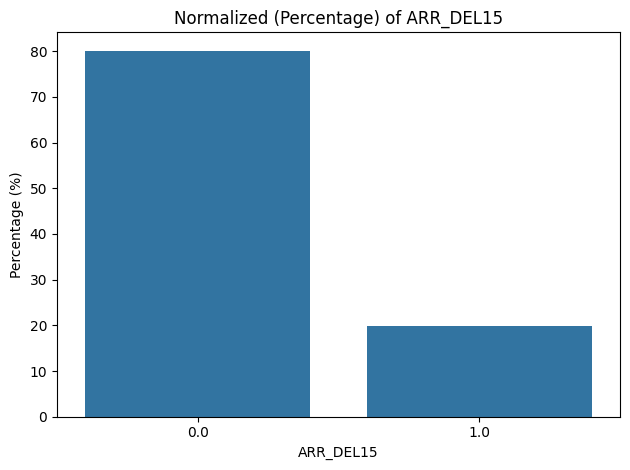

In [72]:

import seaborn as sns

# Selecting an approach 4 to handle missing values
app_number = 4
df_cleaned = handle_missing_values(df, app_number)

# removing the target variables after handling missing values
target = df_cleaned['ARR_DEL15']

target_counts = target.value_counts()
target_percent = target.value_counts(normalize=True) * 100



sns.barplot(x=target_percent.index, y=target_percent.values)
plt.title("Normalized (Percentage) of ARR_DEL15")
plt.xlabel("ARR_DEL15")
plt.ylabel("Percentage (%)")


plt.tight_layout()


# Outlier Detection

**Observation:** The dataset size reduced by roughly 35% has a significant impact on model performance. For now -  I m not removing these data points from our df. Let's decide later.


In [73]:
import pandas as pd


def remove_outliers_iqr(df):

    df_no_outliers = df.copy()

    # Step 1: Iterating through each numeric column to calculate the Interquartile Range (IQR) and identifying outliers
    for col in df.select_dtypes(include=['number']).columns:

        # we have calculated the 25th (Q1) and 75th (Q3) percentiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Step 2: Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1  # Interquartile range between the 25th and 75th percentiles

        # Step 3: Define the lower and upper bounds for identifying outliers
        lower_bound = Q1 - 3 * IQR  # Any value below this is considered as an outlier
        upper_bound = Q3 + 3 * IQR  # Any value above this is considered as an outlier

        # Step 4: Filter the dataframe to retain only values within the defined bounds
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers

# Call the function to remove outliers from the dataset using IQR method
df_no_outliers = remove_outliers_iqr(df)

# Print the original and filtered DataFrame shapes for comparison
print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {df_no_outliers.shape}")


Original Data Shape: (2265248, 19)
Filtered Data Shape: (2108581, 19)


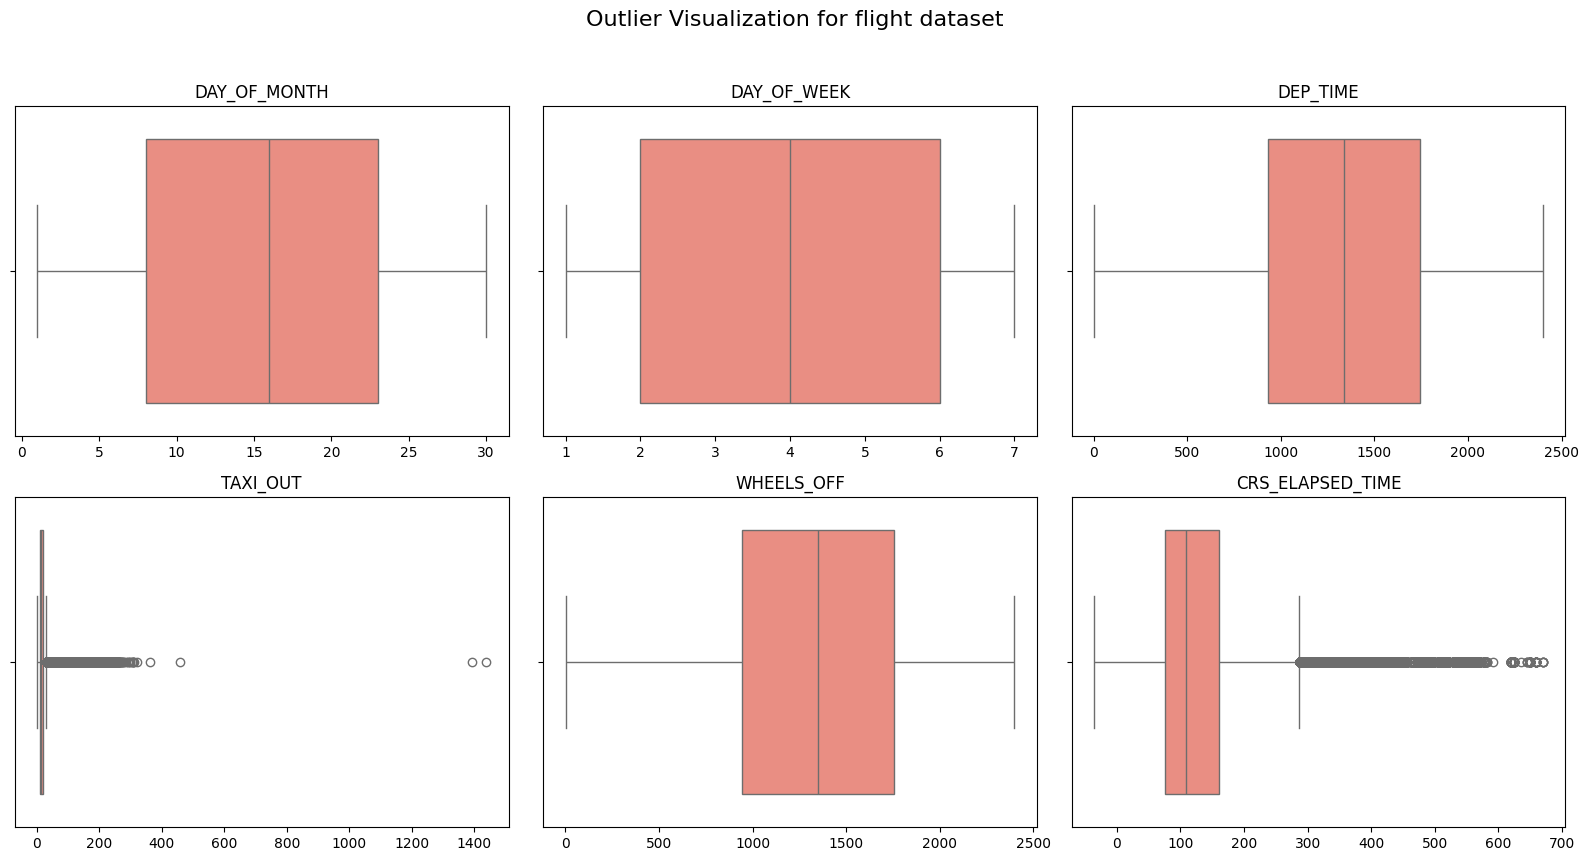

In [74]:
numeric_cols = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'CRS_ELAPSED_TIME']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'{col}')
    plt.xlabel('')

plt.suptitle('Outlier Visualization for flight dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()




In [32]:
print(f"Percentage of Outlier Values {100 - 100 * df_no_outliers.shape[0] / df.shape[0]}")

Percentage of Outlier Values 6.5162121567060325


**Colab Session is not able to handle 2.3 Million rows for Violin Plot**

### Let's not run the below cell

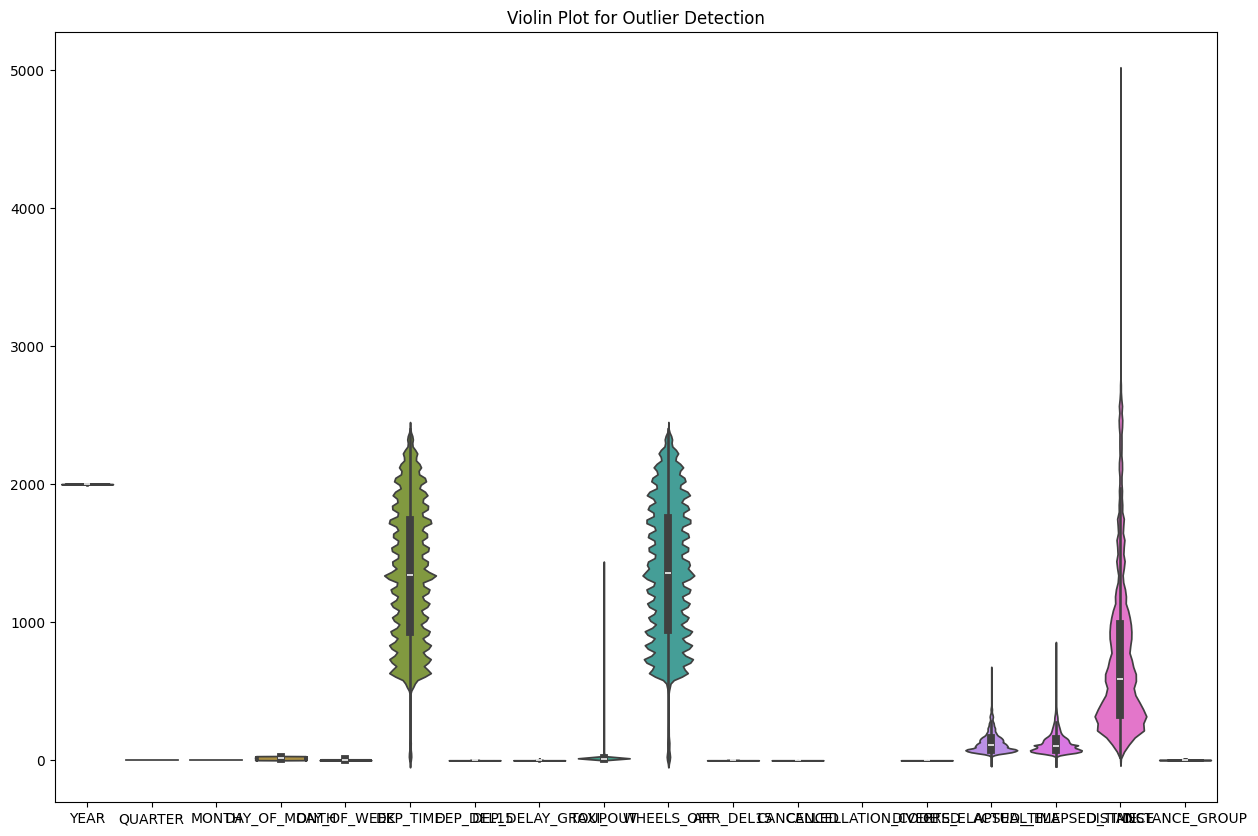

In [ ]:


# Creating a violin plot to visualize the distribution and potential outliers
plt.figure(figsize=(15, 10))
# You can select a single column or multiple columns(entire dataframe)
sns.violinplot(data=df) # Visualizing the distribution of the entire dataset
plt.title('Violin Plot for Outlier Detection')
plt.show()


<Axes: xlabel='CRS_ELAPSED_TIME'>

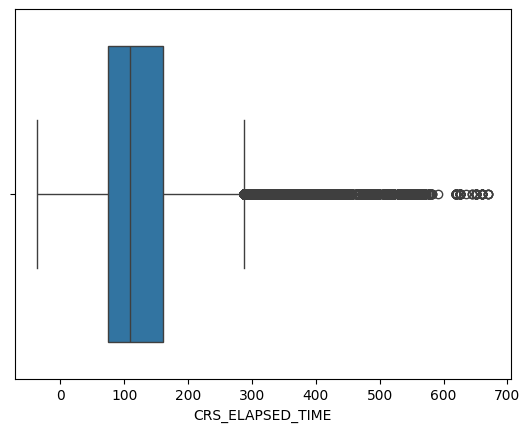

In [ ]:
sns.boxplot(data=df['CRS_ELAPSED_TIME'], orient='h')

In [75]:
df.select_dtypes(include=['int64', 'float64']).columns


Index(['YEAR', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_TIME', 'DEP_DELAY_GROUP',
       'TAXI_OUT', 'WHEELS_OFF', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'DISTANCE_GROUP'],
      dtype='object')

In [76]:
app_number = 4
df_cleaned = handle_missing_values(df, app_number)

In [78]:
df_cleaned.to_csv("df_cleaned.csv", index=False)


In [79]:
print(len(df_cleaned))

2265248


I just saved cleaned df as df_cleaned.csv in the current working directory
We can now merge the creative (new datasource) with df_cleaned